In [30]:
import numpy as np
from scipy.optimize import root_scalar

def psat(A,B,C,T): return np.exp(A-B/(T+C))

T = 96
P = 101.325
z1 = 0.30
z2 = 1 - z1

# Hexane psat
p1 = psat(13.8193,2696.04,224.317,T)

# Toluene psat
p2 = psat(13.9320,3056.96,217.625,T)

x1 = (P-p2)/(p1-p2)
x2 = 1 - x1

y1 = x1*p1/P
y2 = 1 - y1

# Dew point
p_dew = 1/((z1/p1) + (z2/p2))

# Bubble point
p_bub = z1*p1 + z2*p2

# L/F
VF = (z1-x1)/(y1-x1)

LF = 1 - VF

print('P1 = %0.2f' % p1)
print('P2 = %0.2f' % p2)
print('Pdew = %0.2f' % p_dew)
print('Pbub = %0.2f' % p_bub)
print('x1 = %0.3f' % x1)
print('x2 = %0.3f' % x2)
print('y1 = %0.3f' % y1)
print('y2 = %0.3f' % y2)
print('V/F = %0.3f' % VF)
print('L/F = %0.3f' % LF)




P1 = 221.96
P2 = 65.68
Pdew = 83.27
Pbub = 112.57
x1 = 0.228
x2 = 0.772
y1 = 0.500
y2 = 0.500
V/F = 0.265
L/F = 0.735


2.1015565117743935
0.012855831037649207
93.98452477416876


C:\Users\pheng\AppData\Local\Temp\ipykernel_33084\196852061.py:66: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


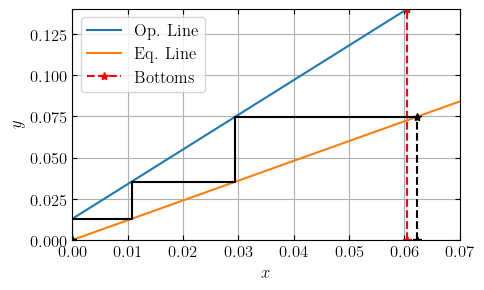

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root_scalar

# Inputs
x_0 = 0
x_N = 0.0605
y_N1 = 0.14
q = 0.92*y_N1
K = 1.20


y1 = (y_N1-q)/(1-q)
b = y1
a = (y_N1-y1)/(x_N-x_0)
#a = (K*x_N-y1)/(x_N-x_0)
LV_min = (K*x_N-y1)/(x_N*(1-y1))
L_min = (1-x_N)*LV_min*100

print(a)
print(b)
print(L_min)

x = np.linspace(0,1,5)

# Linear line, slope a, intercept b
def op_line(x,a,b): return a*x + b

# Stepping function to return step coordinates for graphing
def stepping_x(x_0,x_N,a,b,K):
    
    # Start at inlet comp
    x_n = x_0
    y_0 = op_line(x_0,K,0)
    
    # Resulting vapor equilibrium
    y_n = op_line(x_0,a,b)
    
    x_eq = [x_0,x_0]
    y_eq = [y_0,y_n]
    
    # Max 50 iterations
    for i in range(50):
        
        # Solve for next x value
        sol = root_scalar(lambda x: y_n-op_line(x,K,0),method='secant',x0=x_n)
        x_n = sol.root
        
        # Resulting vapor equilibrium
        y_n = op_line(x_n,a,b)
        
        # Add step coordinates
        x_eq = np.hstack((x_eq,[x_n,x_n]))
        y_eq = np.hstack((y_eq,[op_line(x_n,K,0),y_n]))
        
        if x_n > x_N:
            break
    
    return x_eq, y_eq



x_eq, y_eq = stepping_x(x_0,x_N,a,b,K)

# Plot results
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (5,3)

font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }
plt.rc('text', usetex=True)
plt.rc('font', **font)


# Plot operating line
plt.plot(x,op_line(x,a,b),label='Op. Line')
# PLot equilibrium line
plt.plot(x,op_line(x,K,0),label='Eq. Line')
# Plot desired bottom composition
plt.plot([x_N,x_N],[0,op_line(x_N,a,b)],color='r',linestyle='--',marker='*',label='Bottoms')

# Plot steps
plt.plot(x_eq[0:-1],y_eq[0:-1],color=[0,0,0])
plt.plot([x_eq[0],x_eq[0]],[0,y_eq[0]],color=[0,0,0],linestyle='--',marker='*')
plt.plot([x_eq[-1],x_eq[-1]],[0,y_eq[-2]],color=[0,0,0],linestyle='--',marker='*')



plt.legend(loc='best')
plt.xlabel('$x$',fontfamily='Serif')
plt.ylabel('$y$',fontfamily='Serif')

# Plot limits
plt.xlim([0,0.07])
plt.ylim([0,0.14])

plt.grid('on')
plt.tick_params(top='true',right='true',direction='in')
plt.show()


fig.savefig('CHEN_3100_HW_3_2_1.png',dpi=600,bbox_inches='tight')
#fig.savefig('CHEN_3100_HW_3_2_2.png',dpi=600,bbox_inches='tight')

In [63]:
VN1 = 100
LN = 0.92*y_N1*VN1/x_N
L0 = (1-x_N)*LN
V1 = L0 + VN1 - LN

A1 = L0/(K*V1)
AN = LN/(K*VN1)

A = (A1*AN)**0.5

def kremser(yn1,y1,x0,K,A): return np.log((yn1-K*x0)/(y1-K*x0)*(1-1/A)+1/A)/np.log(A)

N = kremser(y_N1,y1,x_0,K,A)

print(LN)
print(A)
print(N)

212.89256198347113
1.8423354175180748
2.796417723398948


0.9411764705882354
2.0746590093323762
0.018198133524766694
0.06352941176470588
0.028571428571428574
120.35986159169552


C:\Users\pheng\AppData\Local\Temp\ipykernel_33084\2541252998.py:32: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


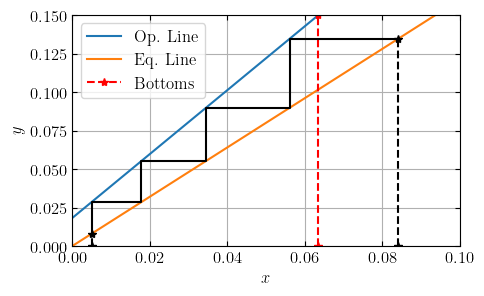

In [75]:
# Inputs
x_0 = 0.005
y_N1 = 0.15
LN = (1-x_0)*200 + 0.90*y_N1*100
LV = LN/100
x_N = 0.90*y_N1*100/LN
K = 1.60

p = (1-x_N)/(1-x_0)

y1 = (y_N1+(p*x_0-x_N)*LV)/(1+(p-1)*LV)
a2 = (K*x_N-y1)/(x_N-p*x_0+y1*(p-1))  
a = (y_N1-y1)/(x_N-x_0)
b = (y1-a*x_0)

LV_min = (K*x_N-y1)/(x_N-p*x_0+y1*(p-1))
L_min = p*LV_min*100

print(p)
print(a)
print(b)
print(x_N)
print(y1)
print(L_min)


x = np.linspace(0,1,5)

x_eq, y_eq = stepping_x(x_0,x_N,a,b,K)

# Plot results
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (5,3)

font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }
plt.rc('text', usetex=True)
plt.rc('font', **font)


# Plot operating line
plt.plot(x,op_line(x,a,b),label='Op. Line')
# PLot equilibrium line
plt.plot(x,op_line(x,K,0),label='Eq. Line')
# Plot desired bottom composition
plt.plot([x_N,x_N],[0,op_line(x_N,a,b)],color='r',linestyle='--',marker='*',label='Bottoms')

# Plot steps
plt.plot(x_eq[0:-1],y_eq[0:-1],color=[0,0,0])
plt.plot([x_eq[0],x_eq[0]],[0,y_eq[0]],color=[0,0,0],linestyle='--',marker='*')
plt.plot([x_eq[-1],x_eq[-1]],[0,y_eq[-2]],color=[0,0,0],linestyle='--',marker='*')



plt.legend(loc='best')
plt.xlabel('$x$',fontfamily='Serif')
plt.ylabel('$y$',fontfamily='Serif')

# Plot limits
plt.xlim([0,0.1])
plt.ylim([0,0.15])

plt.grid('on')
plt.tick_params(top='true',right='true',direction='in')
plt.show()


fig.savefig('CHEN_3100_HW_3_3_1.png',dpi=600,bbox_inches='tight')
#fig.savefig('CHEN_3100_HW_3_3_2.png',dpi=600,bbox_inches='tight')

In [60]:
L0 = 200
VN1 = 100
LN = (1-x_0)*L0 + 0.90*y_N1*VN1
V1 = L0 + VN1 - LN

A1 = L0/(K*V1)
AN = LN/(K*VN1)

A = (A1*AN)**0.5

def kremser(yn1,y1,x0,K,A): return np.log((yn1-K*x0)/(y1-K*x0)*(1-1/A)+1/A)/np.log(A)

N = kremser(y_N1,y1,x_0,K,A)

print(LN)
print(A)
print(N)

212.5
1.3774329125483493
3.0047735804587723
